# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `9` | `Questions`

> Hi Team, 👋

> The initial problem sets were designed for practicing supervised learning in classification problems and hierarchical risk parity algorithms, as well as applying unsupervised learning to portfolio management.

> Given that we haven't covered some these topics in depth yet and will be discussing them further in Lessons 9 and 10, the problem sets have been revised.

> Having reviewed your submissions so far, some of the questions have been crafted specifically to enhance your grasp of the course material.

> I trust that the exercises below will support your review and understanding of the course content. 🤞

#### <font color = "green"> Please submit your answers via the eLearn submission folder. Again, you may submit incomplete answers. (Answer as fully as you can. This will help me to see where you stand.)

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf
yf.pdr_override()

> Let's set some print option.

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

%matplotlib inline

## 👇 <font color = "purple"> Bigger Question 1. 
    
### The first question is to look for clusters of correlations using the agglomerate hierarchical clustering technique (AGNES).
    
### <font color = green> Using the 102 tickers below, and what you have learned in class, run the analysis and develop a dendrogram. Make sure to employ the inclusion criterion of less than 30% of missing values.
    
    According to the dendrogram, which of the stocks are most correlated? 
    
    Also based on the dendrogram, please identify two stocks that are not well correlated.

In [3]:
nasdaq100_components = pd.read_html("https://en.wikipedia.org/wiki/Nasdaq-100")[4]

nasdaq100_components

,Company,Ticker,GICS Sector,GICS Sub-Industry
0,Adobe Inc.,ADBE,Information Technology,Application Software
1,ADP,ADP,Industrials,Human Resource & Employment Services
2,Airbnb,ABNB,Consumer Discretionary,"Hotels, Resorts & Cruise Lines"
3,Align Technology,ALGN,Health Care,Health Care Supplies
4,Alphabet Inc. (Class A),GOOGL,Communication Services,Interactive Media & Services
...,...,...,...,...
96,Warner Bros. Discovery,WBD,Communication Services,Broadcasting
97,"Workday, Inc.",WDAY,Information Technology,Application Software
98,Xcel Energy,XEL,Utilities,Multi-Utilities
99,Zoom Video Communications,ZM,Information Technology,Application Software


### Below are the lines of code that lead to an answer:

In [4]:
stocks = pdr.get_data_yahoo(list(nasdaq100_components["Ticker"]), start=dt.datetime(2000,1,1))
stocks = stocks.loc[ : , ("Adj Close")]

missing_fractions = \
    stocks \
    .isnull() \
    .mean() \
    .sort_values(ascending = False)

drop_list =\
    sorted(list(missing_fractions
                [missing_fractions > 0.3]
                .index)
           )

stocks1 =\
    stocks \
    .drop(labels= drop_list, 
          axis=1)

stocks1 = stocks1.fillna(method = "ffill")
stocks1.head()

[*********************100%%**********************]  101 of 101 completed


C:\Users\eke\AppData\Local\Temp\ipykernel_16212\57707907.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stocks1 = stocks1.fillna(method = "bfill")


,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,ROST,SBUX,SGEN,SIRI,SNPS,TXN,VRTX,WBA,WBD,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.848323,16.274672,28.706926,25.075768,8.052906,11.129503,16.875,23.368805,15.500,45.956352,...,1.741086,2.437765,8.5,36.093262,32.781250,33.468391,18.78125,17.925154,7.818089,7.112463
2000-01-04,0.776801,14.909400,27.254673,25.075768,7.660816,11.262258,16.875,22.214209,14.625,42.442303,...,1.665931,2.360524,8.5,33.679741,30.437500,32.045074,17.28125,17.258350,7.818089,7.276236
2000-01-05,0.788168,15.204172,27.652542,24.834648,7.178245,11.682658,16.875,21.382914,15.000,43.902695,...,1.703509,2.391421,8.5,35.380184,30.703125,31.272402,17.00000,17.454468,7.818089,7.556990
2000-01-06,0.719961,15.328289,26.896574,25.166189,6.740915,11.749037,16.875,21.417561,16.000,44.632893,...,1.521885,2.477932,8.5,36.422382,28.468750,30.418407,16.75000,16.944567,7.818089,7.486797
2000-01-07,0.754065,16.072987,27.652542,25.738834,7.540173,11.903924,16.875,21.602278,16.250,49.652946,...,1.503096,2.465573,8.5,35.873856,28.750000,30.581078,18.21875,17.376026,7.818089,7.486797


In [5]:
#Calculate average annual percentage return and volatilities over a theoretical one year period

returns =\
(
    stocks1
    .pct_change()
    .mean() 
    * 252
)

returns = pd.DataFrame(returns)

returns.columns = ["Returns"]

In [6]:
returns["Volatility"] =\
(    
     stocks1
    .pct_change()
    .std() 
    * np.sqrt(252)
)

data = returns

In [7]:
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler().fit(data)
rescaledDataset = pd.DataFrame(scaler.fit_transform(data),columns = returns.columns, index = returns.index)
X = rescaledDataset
X.head()

,Returns,Volatility
AAPL,1.315750,-0.095261
ADBE,0.483477,0.208903
ADI,-0.581442,0.056761
ADP,-1.018263,-1.360898
ADSK,0.256658,0.105124


In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage, ward, fcluster
#Calulate linkage
Z = linkage(X, 
            method = "ward")

In [11]:
Z[0]

array([3.300e+01, 3.400e+01, 8.336e-03, 2.000e+00])

### <font color = red> Answer 1 is presented in the cell below: </font>

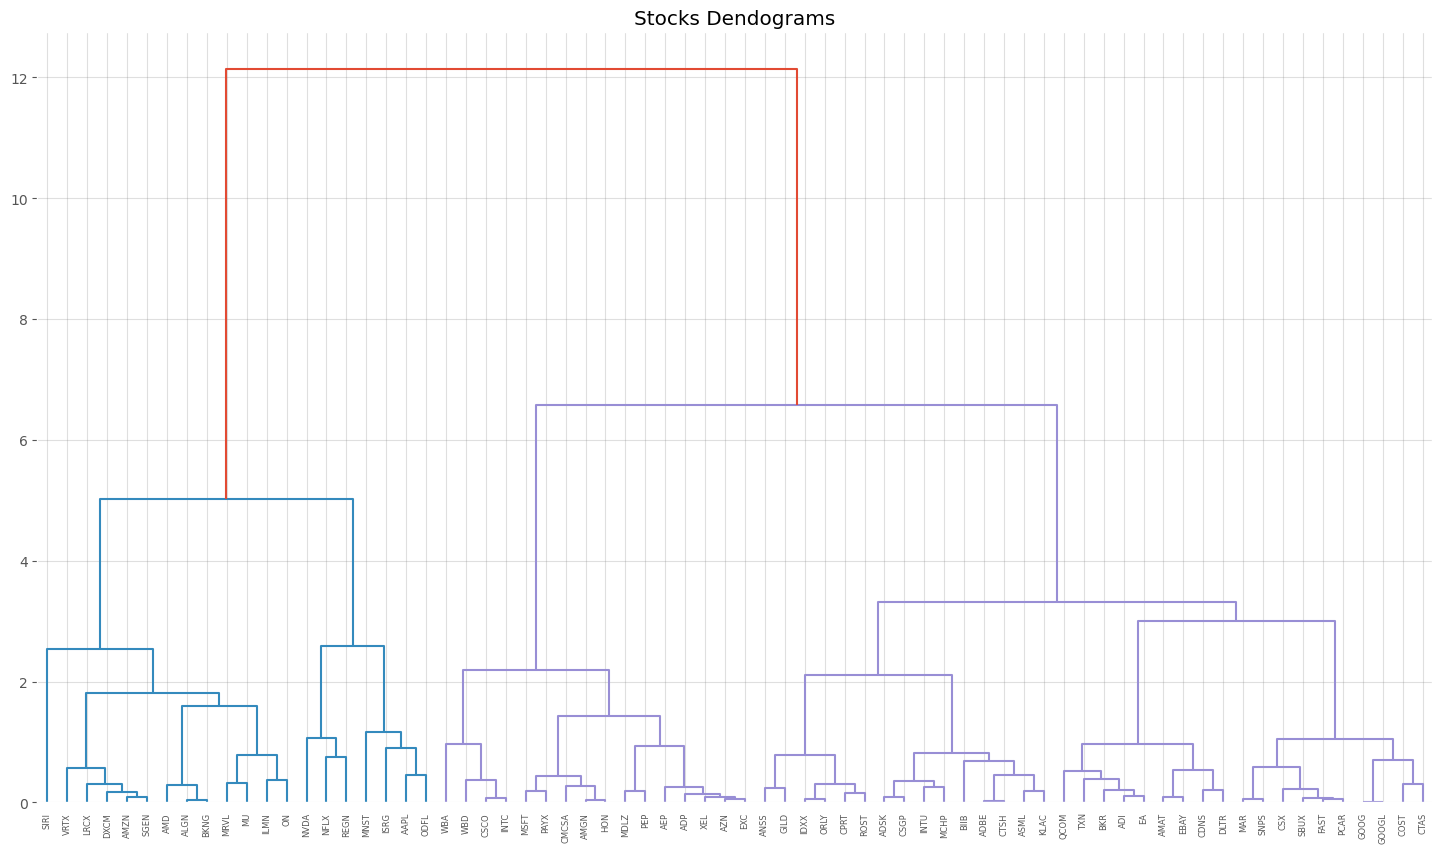

In [12]:
# Plot Dendogram

plt.figure(figsize=(18, 10)
          )
plt.title("Stocks Dendograms")

dendrogram(Z, labels = X.index)

plt.show()

In [13]:
distance_threshold = 0.02

clusters = fcluster(Z, distance_threshold, criterion='distance')

chosen_clusters = pd.DataFrame(data=clusters, 
                               columns=['cluster']
                              )

chosen_clusters['cluster'].value_counts().head(2)

cluster
67    2
17    1
Name: count, dtype: int64

According to the dendrogram, which of the stocks are most correlated? 

In [18]:
X.iloc[chosen_clusters[chosen_clusters['cluster']==67].index]

,Returns,Volatility
GOOG,0.023812,-1.146967
GOOGL,0.015765,-1.149142


Also based on the dendrogram, please identify two stocks that are not well correlated.

randomly pick one from cluster1 and pick one from cluster2, they are not well correlated i.e.any different clusters(two largest clusters shown below)'s stock are not well correlated.

In [15]:
distance_threshold = 10

clusters = fcluster(Z, distance_threshold, criterion='distance')

chosen_clusters = pd.DataFrame(data=clusters, 
                               columns=['cluster']
                              )

chosen_clusters['cluster'].value_counts().head(2)

cluster
2    50
1    20
Name: count, dtype: int64

In [16]:
X.iloc[chosen_clusters[chosen_clusters['cluster']==1].index].head()

,Returns,Volatility
AAPL,1.312182,-0.094552
ALGN,1.100310,1.692349
AMD,0.873061,1.963065
AMZN,0.784223,0.875443
BKNG,0.911519,1.720169


In [17]:
X.iloc[chosen_clusters[chosen_clusters['cluster']==2].index].head()

,Returns,Volatility
ADBE,0.464982,0.209463
ADI,-0.574330,0.057642
ADP,-0.993287,-1.362213
ADSK,0.265530,0.106266
AEP,-1.152001,-1.422488


## 👇 <font color = "purple"> Bigger Question 2. ### 

### The second question asks you to run a principal components analysis (PCA) for portfolio management. Begin your analysis with all the above stocks. Make sure to employ the inclusion criterion of less than 30% of missing values.
    
    Your objective is to find the portfolio using PCA.
    
    Select and normalize the four largest components and use them as weights for 
    portfolios that you can compare to an equal-weighted portfolio comprising all stocks.
    
    Identify the profile of the portfolio based on the portfolio weights.
    
    When comparing the performance of each portfolio over the sample period 
    to "the market", assess the performance of other portfolios that capture different 
    return patterns.
    
> Please use 75% of your data for PCA and 25% for backtesting.    
    
### <font color = "green"> NOTE: The investment horizon will be 10 years between 2010 and 2019.

### Below are the lines of code that lead to an answer:

In [18]:
stocks = pdr.get_data_yahoo(list(nasdaq100_components["Ticker"]), start=dt.datetime(2000,1,1), end=dt.datetime(2020,1,1))

[*********************100%%**********************]  101 of 101 completed


5 Failed downloads:
['GFS', 'GEHC', 'CEG', 'LCID', 'ABNB']: Exception("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1577854800")


In [19]:
stocks = stocks.loc[:,("Adj Close")]

In [20]:
missing_values =\
(
    stocks
    .isnull() # True (1) vs. False (0)
    .mean()
    .sort_values(ascending = False)
)

missing_values.head(10)

CEG     1.000000
LCID    1.000000
ABNB    1.000000
GFS     1.000000
GEHC    1.000000
DDOG    0.985689
CRWD    0.971974
ZM      0.964619
MRNA    0.946730
PDD     0.928245
dtype: float64

In [21]:
drop_list =\
(
    sorted(list(missing_values[missing_values > 0.30]
                .index)
          )
)

stocks =\
(
    stocks
    .drop(labels = drop_list,
          axis = 1)
)

In [22]:
stocks =\
(
    stocks
    .fillna(method = "bfill")
)

C:\Users\eke\AppData\Local\Temp\ipykernel_15188\2423728430.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .fillna(method = "bfill")


In [23]:
Daily_Linear_Return =\
(
    stocks
    .pct_change(1)
)

In [24]:
Daily_Linear_Return =\
(
    Daily_Linear_Return[Daily_Linear_Return 
                        .apply(lambda x:(x - x.mean()
                                        ).abs() < (3 * x.std()
                                                  )
                              )
                        .all(1)
    ]
)

In [25]:
scaler =\
(
    StandardScaler()
    .fit(Daily_Linear_Return)
)

In [26]:
scaled_stocks =\
(
    pd
    .DataFrame(scaler.fit_transform(Daily_Linear_Return),
               columns = Daily_Linear_Return.columns,
               index = Daily_Linear_Return.index)
)

scaled_stocks.describe()

,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,ROST,SBUX,SGEN,SIRI,SNPS,TXN,VRTX,WBA,WBD,XEL
count,3025.000000,3.025000e+03,3.025000e+03,3.025000e+03,3.025000e+03,3.025000e+03,3.025000e+03,3.025000e+03,3025.000000,3.025000e+03,...,3.025000e+03,3.025000e+03,3.025000e+03,3.025000e+03,3.025000e+03,3.025000e+03,3.025000e+03,3.025000e+03,3.025000e+03,3.025000e+03
mean,0.000000,-7.046705e-18,4.697803e-18,-3.053572e-17,3.816965e-17,-1.644231e-17,-1.174451e-17,-2.348902e-18,0.000000,-4.697803e-18,...,-1.291896e-17,2.348902e-18,2.348902e-18,1.115728e-17,2.348902e-18,-1.879121e-17,-4.697803e-18,5.872254e-18,-8.514768e-18,9.395606e-18
std,1.000165,1.000165e+00,1.000165e+00,1.000165e+00,1.000165e+00,1.000165e+00,1.000165e+00,1.000165e+00,1.000165,1.000165e+00,...,1.000165e+00,1.000165e+00,1.000165e+00,1.000165e+00,1.000165e+00,1.000165e+00,1.000165e+00,1.000165e+00,1.000165e+00,1.000165e+00
min,-4.066180,-4.383133e+00,-4.426842e+00,-4.131663e+00,-4.130605e+00,-4.240682e+00,-4.632349e+00,-4.375657e+00,-3.980737,-4.260768e+00,...,-4.197417e+00,-4.424390e+00,-3.673108e+00,-5.271734e+00,-4.696077e+00,-4.421377e+00,-4.331370e+00,-3.976248e+00,-3.692707e+00,-5.169575e+00
25%,-0.546079,-5.507831e-01,-5.647876e-01,-5.631176e-01,-5.820202e-01,-5.889149e-01,-5.603796e-01,-5.908336e-01,-0.578840,-5.811801e-01,...,-5.965986e-01,-5.869998e-01,-5.712750e-01,-4.577766e-01,-5.653384e-01,-5.677199e-01,-5.650884e-01,-5.911712e-01,-4.786258e-01,-5.760598e-01
50%,-0.028442,1.026179e-02,7.301382e-04,-8.056411e-03,1.678403e-02,3.346978e-02,1.918888e-04,4.823780e-03,-0.031844,-3.129661e-02,...,-1.970444e-02,-1.392525e-02,-3.093626e-02,-2.085701e-02,2.954641e-03,5.048388e-03,-1.299661e-02,-3.067073e-02,-2.131771e-02,8.759331e-03
75%,0.561011,5.607930e-01,5.781665e-01,5.907467e-01,5.705900e-01,6.407899e-01,5.542879e-01,5.956735e-01,0.569678,5.868969e-01,...,5.887408e-01,5.618003e-01,5.894939e-01,4.185786e-01,5.416049e-01,5.676758e-01,5.656059e-01,5.916558e-01,5.035807e-01,6.250290e-01
max,4.137935,4.854384e+00,4.022894e+00,4.024873e+00,4.106370e+00,3.453552e+00,4.838367e+00,4.268012e+00,4.152164,4.333412e+00,...,4.275726e+00,4.436619e+00,3.764321e+00,5.416085e+00,4.826438e+00,4.609502e+00,4.204779e+00,3.971374e+00,3.689983e+00,4.233446e+00


In [27]:
prop =\
    int(len(scaled_stocks) * 0.75)

X_Train = scaled_stocks[    : prop] # First 80% of the data
X_Test  = scaled_stocks[prop:     ] # Remaining 20% of the data

X_Train_Raw = Daily_Linear_Return[    :prop]
X_Test_Raw  = Daily_Linear_Return[prop:    ]

In [28]:
stock_tickers =\
(
 scaled_stocks
 .columns
 .values
)

stock_tickers

array(['AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AEP', 'ALGN', 'AMAT', 'AMD',
       'AMGN', 'AMZN', 'ANSS', 'ASML', 'AZN', 'BIIB', 'BKNG', 'BKR',
       'CDNS', 'CMCSA', 'COST', 'CPRT', 'CSCO', 'CSGP', 'CSX', 'CTAS',
       'CTSH', 'DLTR', 'DXCM', 'EA', 'EBAY', 'EXC', 'FAST', 'GILD',
       'GOOG', 'GOOGL', 'HON', 'IDXX', 'ILMN', 'INTC', 'INTU', 'ISRG',
       'KLAC', 'LRCX', 'MAR', 'MCHP', 'MDLZ', 'MNST', 'MRVL', 'MSFT',
       'MU', 'NFLX', 'NVDA', 'ODFL', 'ON', 'ORLY', 'PAYX', 'PCAR', 'PEP',
       'QCOM', 'REGN', 'ROST', 'SBUX', 'SGEN', 'SIRI', 'SNPS', 'TXN',
       'VRTX', 'WBA', 'WBD', 'XEL'], dtype=object)

In [29]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
pca = PCA()

PrincipalComponent = pca.fit(X_Train)

In [30]:
def PCWeights():

    weights = pd.DataFrame()

    for i in range(len(pca.components_[:4])
                  ):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i]
                                                                  )

    weights = weights.values.T
    return weights # Team, be careful with indentation

In [31]:
weights = PCWeights()

In [32]:
def calculate_sharpe_ratio(ts_returns, periods_per_year = 252):

    n_years = ts_returns.shape[0] / periods_per_year

    annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)
                                ) - 1

    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)

    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

In [33]:
# Yet another gift

def backtest_PCA_porfolios(eigen):

    eigen_prtfi =\
        (
            pd
            .DataFrame(data = {"weights": eigen.squeeze()
                              },
                       index = stock_tickers)
        )

    eigen_prtfi.sort_values(by = ["weights"],
                            ascending = False,
                            inplace = True)

    eigen_prtfi_returns =\
    (
        np
        .dot(X_Test_Raw
             .loc[ : , eigen_prtfi.index],
             eigen)
    )

    eigen_portfolio_returns =\
    (
        pd
        .Series(eigen_prtfi_returns.squeeze(),
                index = X_Test_Raw.index)
    )

    returns, vol, sharpe = calculate_sharpe_ratio(eigen_portfolio_returns)

    print("Our PCA-based Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f"  %
          (returns * 100, vol * 100, sharpe)
         )

    # Compared with what? Equal-weightage Portfolio

    equal_weight_return =\
    (
        X_Test_Raw * (1 / len(pca.components_)
                     )
    ).sum(axis = 1)

    df_plot =\
        (
            pd
            .DataFrame({"ML Portfolio Return": eigen_portfolio_returns,
                        "Equal Weight Index": equal_weight_return},
                      index = X_Test.index
                      )
        )

    (
        np
        .cumprod(df_plot + 1)
        .plot(title = "Returns of the equal weighted index vs. Eigen-Portfolio",
              figsize = [16, 8]
             )
    )

    plt.show()

### <font color = red> Answer 2 is presented in the cell below: </font>

Our PCA-based Portfolio:
Return = 36.16%
Volatility = 13.22%
Sharpe = 2.74


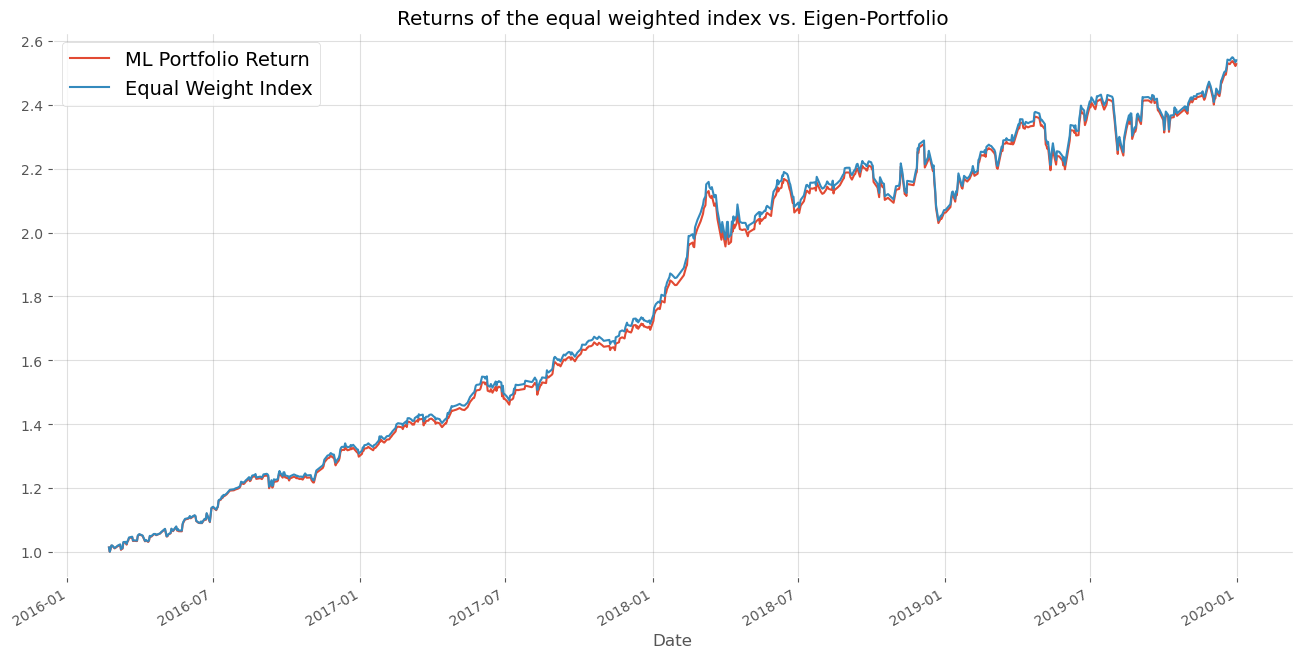

Our PCA-based Portfolio:
Return = 33.61%
Volatility = 33.92%
Sharpe = 0.99


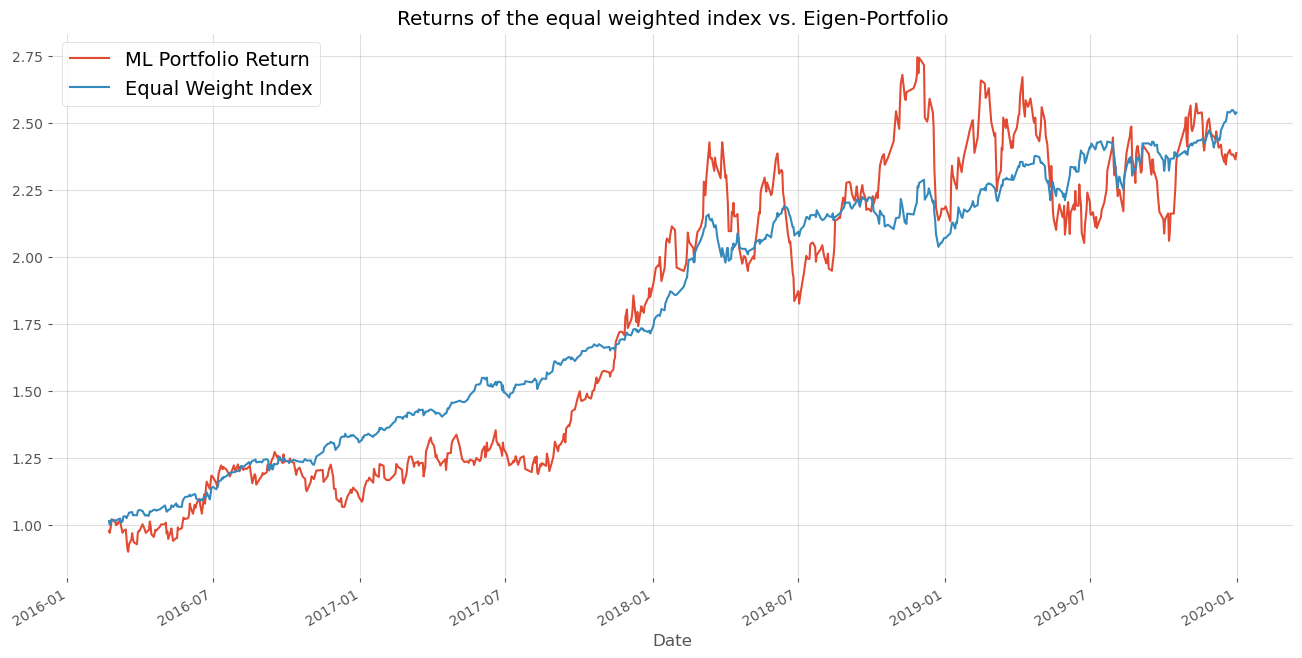

Our PCA-based Portfolio:
Return = -47.70%
Volatility = 85.38%
Sharpe = -0.56


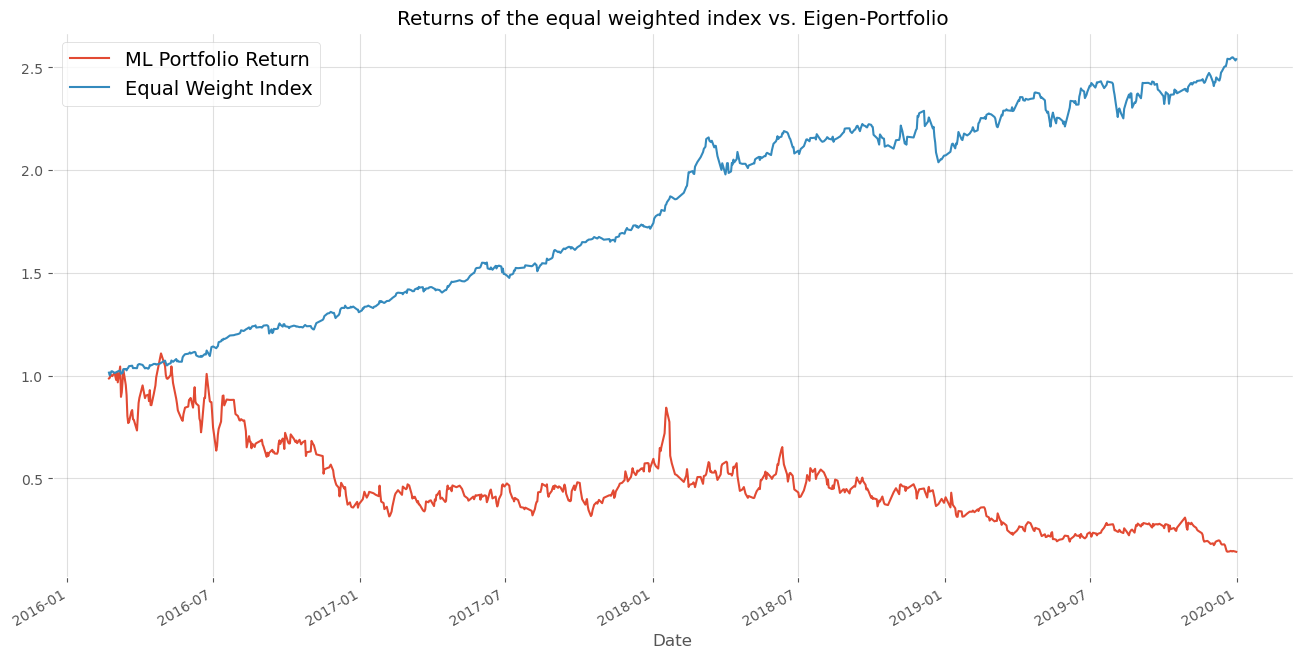

Our PCA-based Portfolio:
Return = -15.77%
Volatility = 78.16%
Sharpe = -0.20


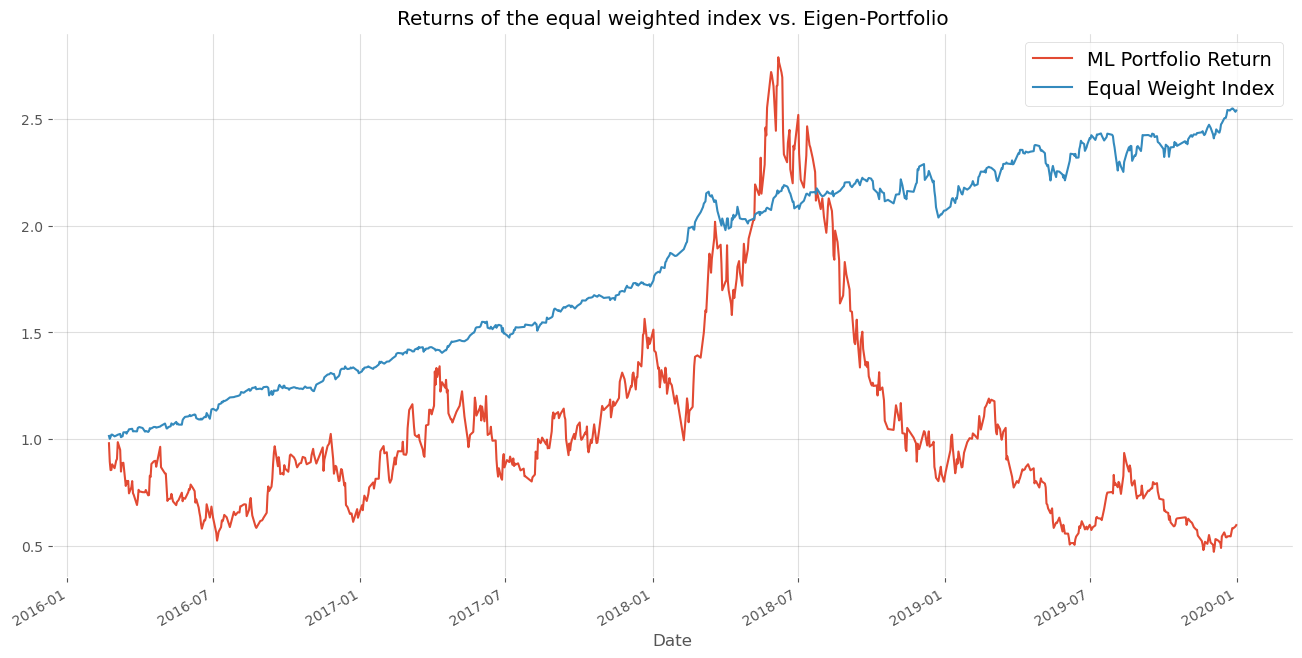

In [34]:
for i in range(len(weights)):
    backtest_PCA_porfolios(eigen = weights[i])

### <font color = blue> 👉 Questions 3. Using `pandas.datareader`, extract the stock prices of the following ticker symbols, between July 2015 and June 2019.

- General Motors `GM`
- Marriott `MAR`
- Pfizer `PFE`
- ExxonMobil `XOM`
- The Walt Disney Company `DIS`
- Bank of America `BAC`
- Proctor & Gamble `PG`
- Hilton `HLT`
- Walmart `WMT`
- Twitter `TWTR`

### Then, calculate simple daily percentage changes in the stock prices, and store them into an object, printing the results into an output cell.

### Below are the lines of code that lead to an answer:

In [35]:
stock_tickers = ["GM", "MAR", "PFE", "XOM", "DIS", "BAC", "PG", "HLT", "WMT", "TWTR"]

In [36]:
stocks = pdr.get_data_yahoo(stock_tickers, start=dt.datetime(2015,7,1),end=dt.datetime(2019,7,1))

[*********************100%%**********************]  10 of 10 completed


1 Failed download:
['TWTR']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [37]:
stocks = stocks.loc[:,("Adj Close")]

In [38]:
stocks = stocks.drop(labels = ["TWTR"], axis=1)

In [39]:
stocks.isnull().values.any()

False

In [40]:
returns = stocks.pct_change()

### <font color = red> Answer 3 is presented in the cell below: </font>

In [41]:
returns

,BAC,DIS,GM,HLT,MAR,PFE,PG,WMT,XOM
Date,,,,,,,,,
2015-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,-0.011033,-0.001390,0.005751,0.000000,-0.002534,-0.009498,0.002634,-0.000278,0.009348
2015-07-06,-0.005285,0.006350,-0.017454,0.000720,-0.006551,-0.003596,0.001501,0.009324,-0.007337
2015-07-07,-0.014758,0.012100,0.006432,0.001799,0.015207,0.014436,0.020862,0.017372,0.004120
2015-07-08,-0.026363,-0.016311,-0.050822,-0.022980,-0.019619,-0.008301,-0.008933,-0.009893,-0.010860
...,...,...,...,...,...,...,...,...,...
2019-06-24,-0.004979,-0.007202,0.001083,-0.006553,-0.002262,0.002061,0.010162,0.000990,-0.009525
2019-06-25,-0.007863,0.005172,0.019481,-0.023662,-0.025446,0.000000,-0.005430,-0.004674,-0.008837
2019-06-26,0.005403,0.003287,0.011943,0.013619,0.017782,-0.017596,-0.017812,-0.005058,0.004326


### <font color = blue> 👉 Questions 4. Using a box-and-whisker plot, compare the performance of the stocks over the given period of time. Find the stock with the highest variability and risk, based on the visualization.

### Below are the lines of code that lead to an answer:

In [42]:
returns.dropna(inplace=True)

### <font color = red> Answer 4 is presented in the cell below: </font>

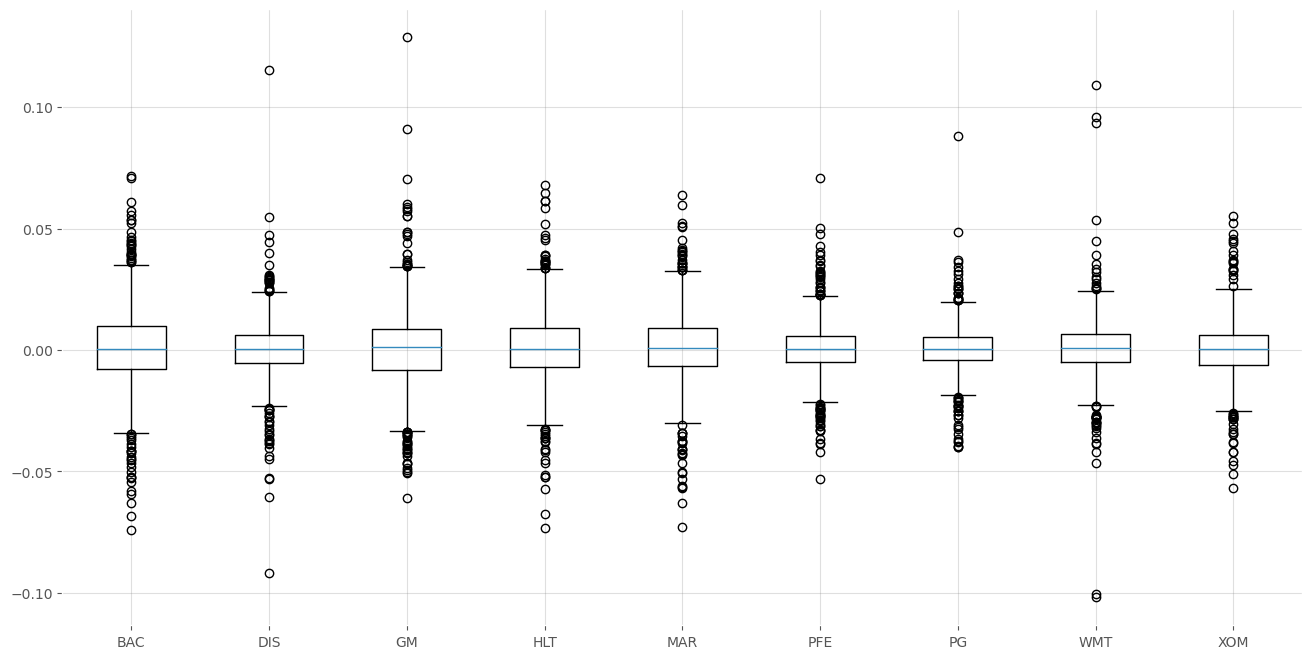

In [43]:
fig = plt.figure(figsize=[16,8])
ax = fig.add_subplot(111)
plt.boxplot(returns)
ax.set_xticklabels(returns.columns)
plt.show()

`WMT`

### <font color = blue> 👉 Questions 5. Create your own function to compare daily percentage changes between stocks, using a scatter plot and its distribution relative to a perfect diagonal (regression line). 

### Assess which of the following pairs seem to show the closest relationships.

1. ExxonMobil (`XOM`) and General Motors (`GM`)
2. Twitter (`TWTR`) and The Walt Disney Company (`DIS`)
3. Marriott (`MAR`) and Hilton (`HLT`)
4. Pfeizer (`PFE`) and Proctor & Gamble (`PG`)
5. Bank of America (`BAC`) and Walmart (`WMT`)

### Upon completion of the above, please execute more tasks for the sake of this question. 

### As you have learned in class, if you wish to look for all combinations of stocks you can use the scatter matrix graph provided by the `pandas` module. Create the scatter matrix, along with a Kernel Density Estimation on the diagonal.

### Below are the lines of code that lead to an answer:

In [44]:
def compare_two_stocks(stock1, stock2):
    stocks = pd.DataFrame({stock1.name:stock1, stock2.name:stock2})
    x = np.linspace(stocks.values.min(), stocks.values.max())
    plt.plot(x,x)
    plt.scatter(stock1, stock2)
    
    plt.xlabel(stock1.name)
    plt.ylabel(stock2.name)
    plt.title(f"{stock1.name} vs {stock2.name}")
    plt.show()

### <font color = red> Answer 5 is presented in the cell below: </font>

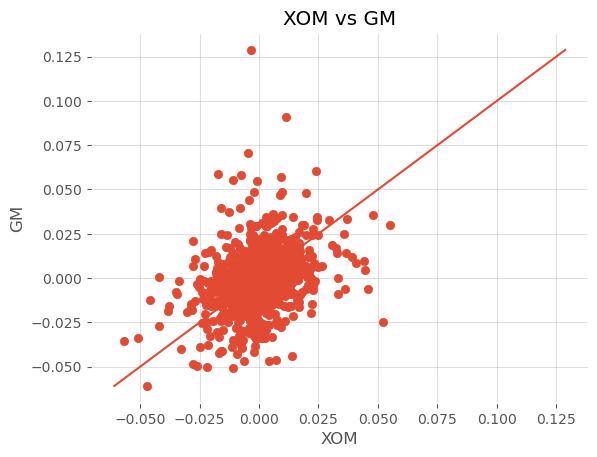

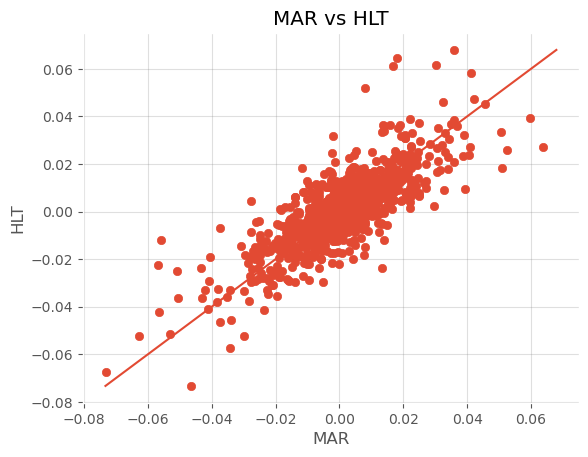

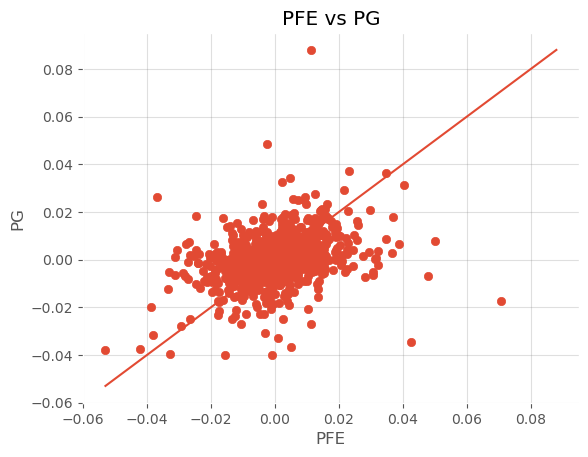

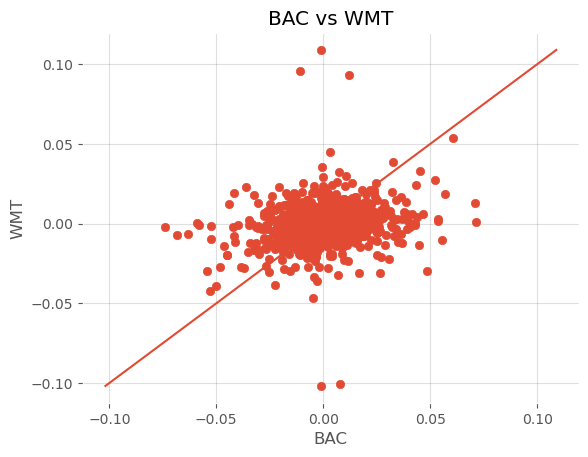

In [45]:
lst_pairs = [["XOM","GM"], ["MAR", "HLT"], ["PFE", "PG"], ["BAC", "WMT"]]

for pair in lst_pairs:
    compare_two_stocks(returns[pair[0]], returns[pair[1]])

Assess `MAR` and `HLT` seem to show the closest relationships.

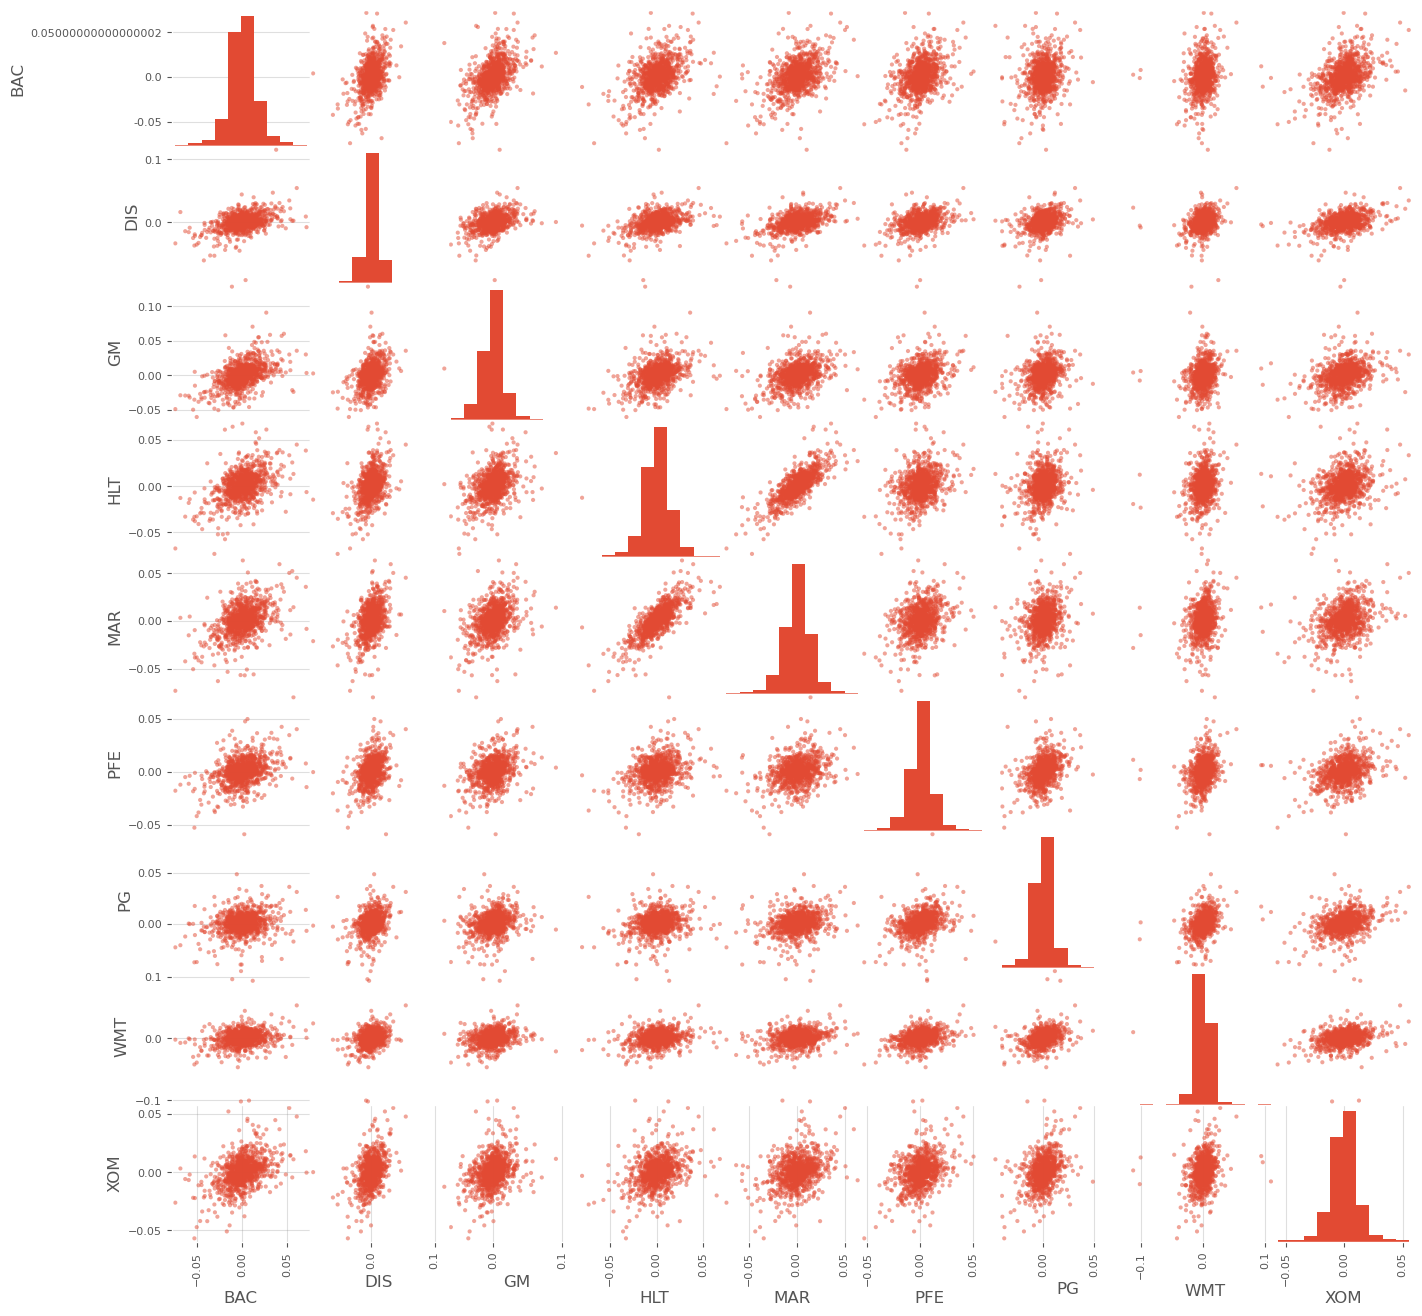

In [46]:
from pandas.plotting import scatter_matrix
scatter_matrix(returns,
               figsize = (16, 16)
              )
plt.show()

### <font color = blue> 👉 Question 6. It is often useful to analyze stock performance against a market index such as the S&P 500. This will give a sense of how a stock price compares to movements in the overall market.

### Carry out the following analysis steps.

<font color = green>

> ### 1. Extract the S&P 500 (`^GSPC`) data for the same time period used for the stocks in Question 1.

> ### 2. In order to perform comparisons, you must run the same calculations to derive the daily percentage changes and cumulative returns on the index. You might first want to concatenate the index calculations in the results of the calculations of the stocks with respect to daily percentage changes. The process will lead you to efficiently compare the overall set of stocks and index calculations for daily percentage changes.

> ### 3. Calculate the cumulative daily returns.

> ### 4. To complete this analysis, calculate the correlation of the daily percentage change values.

> ### 5. Using location accessor, print only the correlational coefficients of each stock relative to the S&P 500, in descending order.

</font> 
        
### Which stock price moved in the most similar way to the S&P 500? Which moved in the least similar way?

### Below are the lines of code that lead to an answer:

In [47]:
sp500 = pdr.get_data_yahoo(["^GSPC"], start=dt.datetime(2000,1,1))[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


In [48]:
sp500 = sp500.rename(columns={"Adj Close":"sp500"})
prices = pd.concat([sp500, stocks1], axis=1)
returns = prices.pct_change()

In [49]:
cul_returns = np.cumprod(returns+1)

In [50]:
correlation_matrix = returns.corr()

### <font color = red> Answer 6 is presented in the cell below: </font>

In [51]:
correlation_matrix["sp500"].sort_values(ascending=False)

sp500    1.000000
PCAR     0.714283
MSFT     0.708228
HON      0.698644
ADP      0.674618
           ...   
SGEN     0.372608
DXCM     0.367217
MNST     0.331347
NFLX     0.331015
SIRI     0.285522
Name: sp500, Length: 71, dtype: float64

**Which stock price moved in the most similar way to the S&P 500?**

In [52]:
correlation_matrix["sp500"].sort_values(ascending=False).index[1]

'PCAR'

**Which moved in the least similar way?**

In [53]:
correlation_matrix["sp500"].sort_values(ascending=False).index[-1]

'SIRI'

### <font color = blue> 👉 Question 7. One common type of data visualization in finance is a stock’s trading volume relative to its closing price.

### Create a chart below after obtaining the data from Yahoo Finance!, using `pandas.datareader`. The target symbol is `AMZN`, and our period of interest is between January 2007 and December 2009. 

In [54]:
AMZN = pdr.get_data_yahoo(["AMZN"], start=dt.datetime(2007,1,1), end=dt.datetime(2010,1,1))

[*********************100%%**********************]  1 of 1 completed


### Below are the lines of code that lead to an answer:

In [55]:
AMZN

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,1.9340,1.9530,1.9025,1.9350,1.9350,248102000
2007-01-04,1.9295,1.9570,1.9130,1.9450,1.9450,126368000
2007-01-05,1.9360,1.9395,1.8800,1.9185,1.9185,132394000
2007-01-08,1.9110,1.9155,1.8585,1.8750,1.8750,135660000
2007-01-09,1.8800,1.9030,1.8670,1.8890,1.8890,114060000
...,...,...,...,...,...,...
2009-12-24,6.9600,6.9850,6.8770,6.9235,6.9235,102576000
2009-12-28,6.9875,7.0990,6.9265,6.9655,6.9655,175278000
2009-12-29,7.0645,7.1290,6.9275,6.9705,6.9705,168012000


In [56]:
def visulize_price_volume(stock):
    plt.figure(figsize=(18, 9))

    plt.bar(stock.index, stock["Volume"], color='blue', alpha=0.5)

    ax2 = plt.twinx()

    ax2.plot(stock.index, stock["Close"], color='red')


    plt.xlabel('Date')
    plt.ylabel('Volume')
    ax2.set_ylabel('Closing Price')

    plt.title('Stock Trading Volume vs. Closing Price')
    plt.show()

### <font color = red> Answer 7 is presented in the cell below: </font>

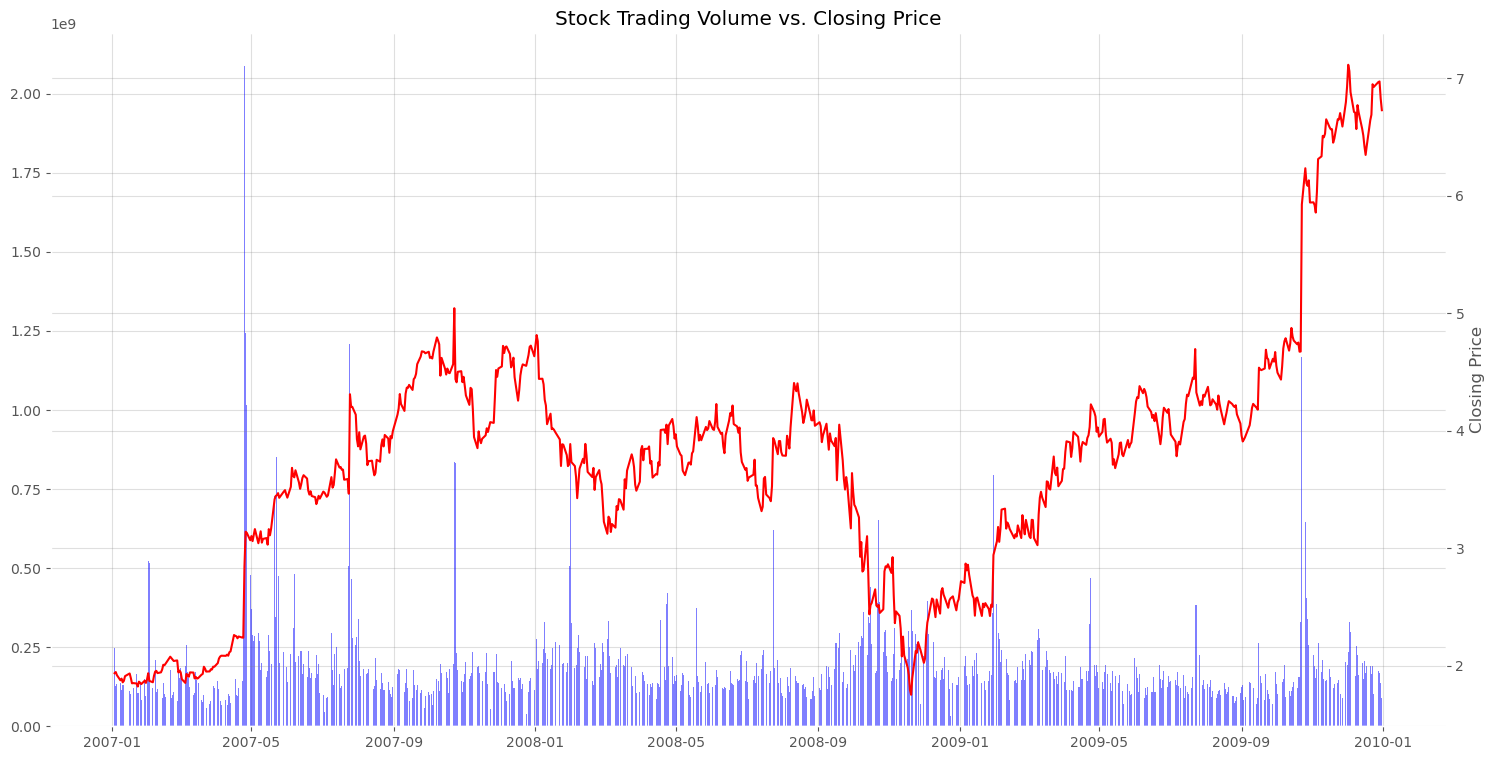

In [57]:
visulize_price_volume(AMZN)

## 👇 <font color = "purple"> Bigger Question 8. 

### Please create a predictive model for the weekly return of NFLX stock. You will use supervised learning for your predictive modelling.

> As you learned in class, to do this it is essential to know what factors are related to Netflix’s stock price, and to incorporate as much information as you can into the model.

> Among the three major factors (correlated assets, technical indicators, and fundamental analysis), you will use correlated assets and technical indicators as features here.

    Step 1. Use 75% of your data for the training of your algorithm, and 25% for the testing set.

    Step 2. For your feature engineering...
    
> Our operational definition of `outcome` (`Y`) is the weekly return of Netflix (NFLX). The number of trading days in a week is assumed to be five, and we compute the return using five trading days. 
<br>
    
* <font color = "green"> NOTE: The lagged five-day variables embed the time series component by using a time-delay approach, where the lagged variable is included as one of the predictor variables. This step translates the time series data into a supervised regression-based model framework.
<br>    
    
> For `input features` (`predictors`; `Xs`), we use (The variables used as predictors are as follows) ...

> `Correlated assets`

* lagged five-day returns of stocks (META, APPLE, AMZN, GOOGL);
* currency exchange rates (USD/JPY and GBP/USD);
* indices (S&P 500, Dow Jones, and VIX);
* lagged five-day, 15-day, 30-day, and 60-day returns of NFLX.

> `Technical indicators`

* 21-day, 63-day, and 252-day moving averages;
* 10-day, 30-day, and 200-day exponential moving averages;
* 10-day, 30-day, and 200-day relative strength index;
* stochastic oscillator %K and %D (using rolling windows of 10-, 30-, 200-day);
* rate of change (using 10-, 30-day past prices).
    
    
    Step 3. For your algorithm of choices, please assess the model performance of the following algorithms: 

    
* Linear Regression
* Elastic Net
* LASSO
* Support Vector Machine
* K-Nearest Neighbor
* ARIMA
* Decision Tree
* Extra Trees 
* Random Forest
* Gradient Boosting Tree
* Adaptive Boosting
    
    
    Step 4. For this exercise, hyperparameter tuning is not requested. 
    
    Step 5. But make sure to compare the model performance of the above algorithms.

> The metric for assessing model performance will be mean squared error (`MSE`).
<br>

> Show which of the algorithms perform relatively better by a comparison visualization of performance, for both the training and testing sets learned in class. 

    Step 6. Using the model of your choice, please visualize the actual vs. predicted (estimated) data.

### Below are the lines of code that lead to an answer:

In [58]:
stock_ticker = ["NFLX","META","AAPL","AMZN","GOOGL"]

currency_ticker = ["DEXJPUS", "DEXUSUK"]

index_ticker = ["SP500", "DJIA", "VIXCLS"]


stock_data = pdr.get_data_yahoo(stock_ticker)
currency_data = pdr.get_data_fred(currency_ticker)
index_data = pdr.get_data_fred(index_ticker)

[*********************100%%**********************]  5 of 5 completed


In [59]:
return_period = 5

In [3]:
Y =\
    (np
     .log(stock_data.loc[ : , ("Adj Close", "NFLX")]
         )
     .diff(return_period)
     .shift(-return_period)
    )

Y

NameError: name 'np' is not defined

In [61]:
Y.name = Y.name[-1]+"_pred"
Y

Date
1980-12-12   NaN
1980-12-15   NaN
1980-12-16   NaN
1980-12-17   NaN
1980-12-18   NaN
              ..
2023-10-19   NaN
2023-10-20   NaN
2023-10-23   NaN
2023-10-24   NaN
2023-10-25   NaN
Name: NFLX_pred, Length: 10808, dtype: float64

In [2]:
X1 =\
    (np.
     log(stock_data.loc[ : , ("Adj Close", ("META","AAPL","AMZN","GOOGL")
                             )
                       ]
        )
     .diff(return_period)
     .shift(-return_period)
    )

X1.columns =\
    (X1
     .columns
     .droplevel()
    )

X1

NameError: name 'np' is not defined

In [63]:
X2 =\
    (np
     .log(currency_data)
     .diff(return_period)
    )

X2

,DEXJPUS,DEXUSUK
DATE,,
2018-10-29,NaN,NaN
2018-10-30,NaN,NaN
2018-10-31,NaN,NaN
2018-11-01,NaN,NaN
2018-11-02,NaN,NaN
...,...,...
2023-10-16,NaN,NaN
2023-10-17,0.007307,-0.006696
2023-10-18,0.004615,-0.012595


In [64]:
X3 =\
    (np
     .log(index_data)
     .diff(return_period)
    )

X3

,SP500,DJIA,VIXCLS
DATE,,,
2018-10-29,NaN,NaN,NaN
2018-10-30,NaN,NaN,NaN
2018-10-31,NaN,NaN,NaN
2018-11-01,NaN,NaN,NaN
2018-11-02,NaN,NaN,NaN
...,...,...,...
2023-10-19,-0.016601,-0.006472,0.248581
2023-10-20,-0.024234,-0.016259,0.116632
2023-10-23,-0.036460,-0.031327,0.168573


In [65]:
X4 =\
    (
    pd
    .concat([np
             .log(stock_data.loc[ : , ("Adj Close", "NFLX")
                                ]
                 )
             .diff(i) for i in [return_period, 
                                return_period * 3, 
                                return_period * 6, 
                                return_period * 12]
            ],
           axis = 1
           )
    .dropna()
)

X4.columns = ["NFLX_DT", "NFLX_3DT", "NFLX_6DT", "NFLX_12DT"]

In [66]:
NFLX = pdr.get_data_yahoo(["NFLX"])
NFLX.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [67]:
X5 = (
    pd.concat(
        [
            NFLX["Adj Close"]
            .rolling(i)
            .mean() 
            for i in [21
                      ,63
                      ,252
                     ]
        ],
        axis=1
    )
)

X5.columns = ["NFLX_SMA21","NFLX_SMA63","NFLX_SMA252"]

In [68]:
X6 = (
    pd.concat(
        [
            NFLX["Adj Close"]
            .ewm(i).mean() 
            for i in [10,
                      30,
                      200]
        ],
        axis=1
    )
)

X6.columns = ["NFLX_EMA10","NFLX_EMA30","NFLX_EMA200"]

In [69]:
def cal_RSI(period, stock1):
    stock = stock1.copy()
    stock["change"] = stock.diff()

    stock["gain"] = stock["change"].apply(lambda x: x if x > 0 else 0)
    stock["loss"] = stock["change"].apply(lambda x: -x if x < 0 else 0)

    stock["avg_gain"] = stock["gain"].rolling(period).mean()
    stock["avg_loss"] = stock["loss"].rolling(period).mean()
    stock["RS"] = stock["avg_gain"]/stock["avg_loss"]
    stock["RSI"] = 100 - 100/(1+stock["RS"])
    
    return stock["RSI"]

In [70]:
X7 = pd.DataFrame([cal_RSI(10,NFLX["Adj Close"]),cal_RSI(30,NFLX["Adj Close"]),cal_RSI(200,NFLX["Adj Close"])]).T

X7.columns = ["NFLX_RSI10","NFLX_RSI30","NFLX_RSI200"]

In [83]:
def cal_SO(period, stock1):
    stock = stock1.copy()
    stock["lowest_low"] = stock["Low"].rolling(period).min()
    stock["highest_high"] = stock["High"].rolling(period).max()
    stock[f"{period}%K"] = ((stock["Close"] - stock["lowest_low"]) / (stock["highest_high"] - stock["lowest_low"])) * 100
    stock[f"{period}%D"] = stock[f"{period}%K"].rolling(3).mean()
    
    return stock[[f"{period}%K", f"{period}%D"]]

In [88]:
X8 = pd.concat([cal_SO(10, NFLX),cal_SO(30, NFLX),cal_SO(200, NFLX)], axis = 1)

In [95]:
X9 = pd.concat([NFLX["Adj Close"].pct_change(10)*100, NFLX["Adj Close"].pct_change(30)*100], axis = 1)
X9.columns = ["ROC10", "ROC30"]

In [97]:
X = pd.concat([X1, X2, X3, X4, X5, X6, X7, X8, X9],axis=1)
X

,META,AAPL,AMZN,GOOGL,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,NFLX_DT,...,NFLX_RSI30,NFLX_RSI200,10%K,10%D,30%K,30%D,200%K,200%D,ROC10,ROC30
1980-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-19,-0.035641,-0.029482,-0.030148,-0.008818,0.001402,-0.005665,-0.016601,-0.006472,0.248581,0.106448,...,40.444400,54.142749,88.819646,34.051248,54.241134,19.774627,58.316219,41.575580,7.831663,-9.335656
2023-10-20,-0.019380,-0.033950,-0.036245,-0.012896,0.001536,0.001153,-0.024234,-0.016259,0.116632,0.119830,...,40.356783,53.588535,85.313272,59.151115,53.470881,36.366789,57.910551,48.902356,5.098158,-9.448961
2023-10-23,-0.022483,-0.032529,-0.046243,-0.018869,NaN,NaN,-0.036460,-0.031327,0.168573,0.120041,...,41.255793,53.791035,94.234535,89.455818,61.672119,56.461378,60.855412,59.027394,5.412614,-8.649181
2023-10-24,-0.035979,-0.021165,-0.022383,-0.006534,NaN,NaN,-0.029122,-0.025509,0.059176,0.151070,...,45.158910,53.828517,95.886615,91.811474,73.662872,62.935291,64.306113,61.024025,10.824495,-4.821825


In [98]:
data =\
(
pd
.concat([Y, X],
        axis = 1)
.dropna()
.iloc[ : :return_period, :]
)

In [99]:
Y = data.loc[ : , Y.name]

Y

2018-11-05   -0.070151
2018-11-13   -0.097766
2018-11-21    0.096721
2018-11-30   -0.059136
2018-12-10   -0.025917
                ...   
2023-09-18   -0.024642
2023-09-25   -0.011684
2023-10-02    0.014669
2023-10-10   -0.048292
2023-10-18    0.172214
Name: NFLX_pred, Length: 235, dtype: float64

In [100]:
X = data.loc[ : , X.columns]

X

,META,AAPL,AMZN,GOOGL,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,NFLX_DT,...,NFLX_RSI30,NFLX_RSI200,10%K,10%D,30%K,30%D,200%K,200%D,ROC10,ROC30
2018-11-05,0.045336,-0.051482,0.056175,0.020092,0.006468,0.016495,0.036089,0.040835,-0.213073,0.102041,...,41.310277,53.130702,67.661028,60.068120,38.264566,36.995716,42.399789,44.738324,-4.278693,-14.655985
2018-11-13,-0.053282,-0.054816,-0.007111,-0.020402,0.005190,-0.003447,-0.012148,-0.013689,0.005510,-0.054339,...,37.726946,50.558972,12.339907,34.312748,21.135620,22.940477,31.154461,32.711564,3.005492,-21.938807
2018-11-21,-0.067399,-0.055132,-0.052828,-0.010629,-0.005645,-0.018227,-0.019304,-0.024860,-0.021404,-0.089700,...,39.766962,49.912745,14.783677,12.594553,9.330773,7.900135,13.907005,16.280069,-19.960304,-19.564886
2018-11-30,0.065236,0.035858,0.117992,0.074389,0.006273,-0.002502,0.047336,0.050288,-0.174730,0.100313,...,38.704505,50.211945,86.601160,80.253292,34.149347,31.267088,20.859077,20.693571,-1.354890,-17.472812
2018-12-10,0.008780,-0.051594,-0.029505,-0.052230,-0.005121,-0.014546,-0.056259,-0.055862,0.320001,-0.059136,...,41.501635,49.427098,35.396282,41.792835,24.009769,27.358805,11.373485,13.032357,4.203695,-13.798058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-18,-0.016424,-0.007780,-0.022044,0.009378,0.007957,-0.010108,-0.007590,-0.001138,0.014389,-0.121517,...,41.126800,54.407011,2.958073,2.381411,2.958073,3.486321,57.181338,58.540886,-10.339186,-8.619094
2023-09-25,-0.005701,-0.010677,-0.064243,-0.052738,0.007491,-0.015028,-0.026413,-0.017993,0.188256,-0.024642,...,40.893367,53.154659,9.600478,4.241942,8.576375,3.849930,52.644258,51.755750,-13.597988,-8.741644
2023-10-02,0.019716,-0.013321,-0.013884,0.023071,0.007101,-0.007229,-0.011373,-0.017009,0.041153,-0.011684,...,43.364771,52.411386,34.021300,24.195843,11.208233,8.496239,50.531681,49.476184,-3.567446,-5.982254
2023-10-10,0.067144,0.034155,0.037455,0.041634,-0.003627,0.017983,0.029996,0.022084,-0.149695,-0.009146,...,36.158899,53.050025,21.981259,47.071648,7.052564,15.102675,47.218680,50.498610,-1.563610,-10.701811


In [101]:
validation_size = 0.25

train_size =\
    int(len(X) 
        * 
        (1 - validation_size)
       )

X_train, X_test =\
    (X[0         :train_size], 
     X[train_size:len(X)    ]
    )

Y_train, Y_test =\
    (Y[0         :train_size], 
     Y[train_size:len(X)    ]
    )

In [102]:
#next we fill in the model mentioned in step 3
# Loading Algorithm

from sklearn.linear_model import LinearRegression

# Regularization
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# ENSEMBLE

## Bagging
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

## Boosting
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Support Vector Machine
from sklearn.svm import SVR

# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor

# Multi-layer Perceptron (Neural Networks)
from sklearn.neural_network import MLPRegressor

In [103]:
# for assessment
from sklearn.metrics import mean_squared_error

#for ingore warnings
import warnings
warnings.filterwarnings("ignore")

In [104]:
models = []
#Linear Regression
models.append(("LR", LinearRegression()
             )
            )

#Elastic Net
models.append(("EN", ElasticNet()
             )
            )

#LASSO
models.append(("LASSO", Lasso()
             )
            )

#Support Vector Machine
models.append(("SVR", SVR()
             )
            )

#K-Nearest Neighbor
models.append(("KNN", KNeighborsRegressor()
             )
            )

#ARIMA

#Decision Tree
models.append(("CART", DecisionTreeRegressor()
             )
            )

#Extra Trees
models.append(("ETR", ExtraTreesRegressor()
              )
             )

#Random Forest
models.append(("RFR", RandomForestRegressor()
              )
             )

#Gradient Boosting Tree
models.append(("GBR", GradientBoostingRegressor()
              )
             )

#Adaptive Boosting
models.append(("ABR", AdaBoostRegressor()
              )
             )

In [106]:
train_results = []
test_results = []

names = []

for name, model in models:
    
    names.append(name)
    
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    

In [109]:
#we're not done yet still have ARIMA left
import statsmodels.tsa.arima.model as stats
import statsmodels.api as sm

modelARIMA =\
(    stats
     .ARIMA(endog = Y_train,
                exog = X_train,
                order = [1, 0, 0]
            )
)

model_fit = modelARIMA.fit()

E:\software\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\software\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\software\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\software\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [110]:
train_mse = mean_squared_error(Y_train,model_fit.fittedvalues)

In [111]:
predicted =\
(
    model_fit
    .predict(start = train_size - 1,
             end = len(X) - 1,
             exog = X_test)[1: ]
)

E:\software\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [112]:
test_mse = mean_squared_error(Y_test,predicted)

In [113]:
names.append("ARIMA")
train_results.append(train_mse)
test_results.append(test_mse)

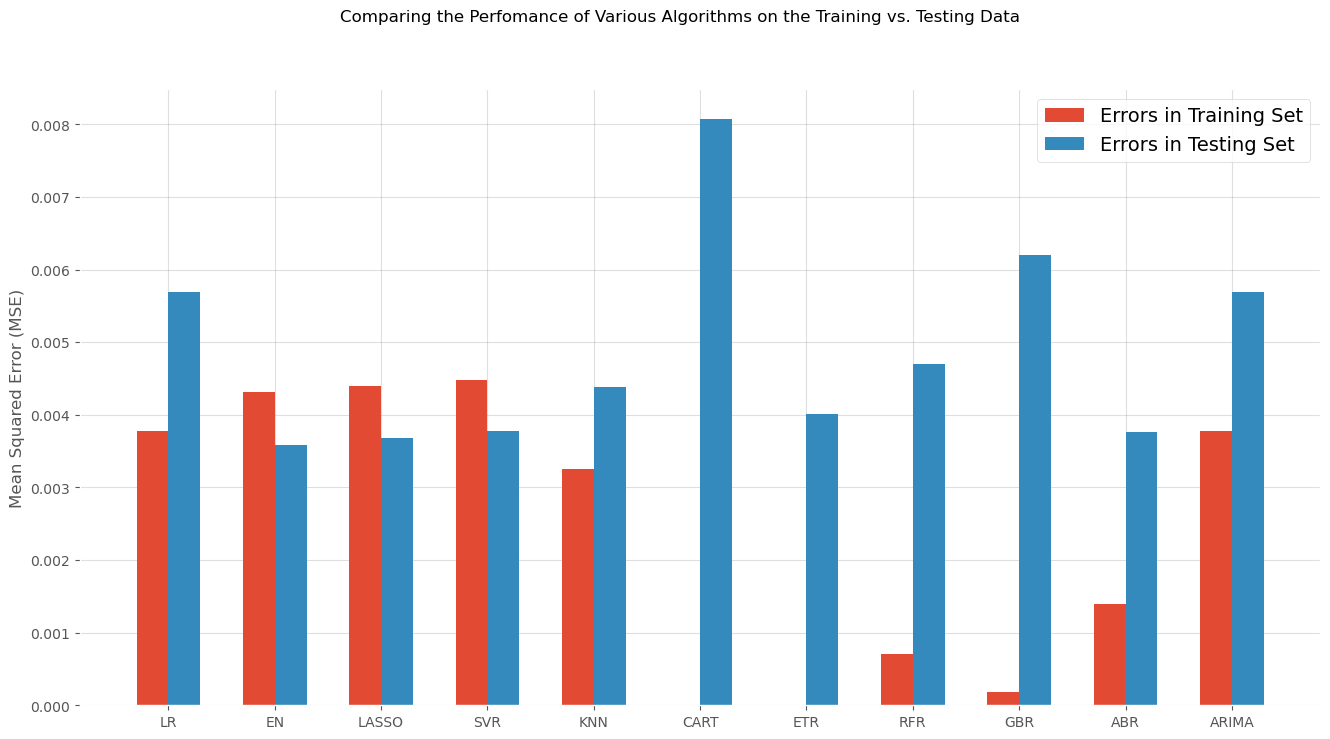

In [114]:
#finally we visualize it
fig = plt.figure(figsize = [16, 8])

ind = np.arange(len(names)
               )

width = 0.30

fig.suptitle("Comparing the Perfomance of Various Algorithms on the Training vs. Testing Data")

ax = fig.add_subplot(111)

(plt
 .bar(ind - width/2,
      train_results,
      width = width,
      label = "Errors in Training Set")
)

(plt
 .bar(ind + width/2,
      test_results,
      width = width,
      label = "Errors in Testing Set")
)

plt.legend()

ax.set_xticks(ind)
ax.set_xticklabels(names)

plt.ylabel("Mean Squared Error (MSE)")

plt.show()

In [127]:
res = models[-1][1].fit(X_train,Y_train)
predicted = res.predict(X_test)

In [128]:
predicted = pd.DataFrame(predicted)
predicted.index = Y_test.index

### <font color = red> Answer 8 is presented in the cell below: </font>

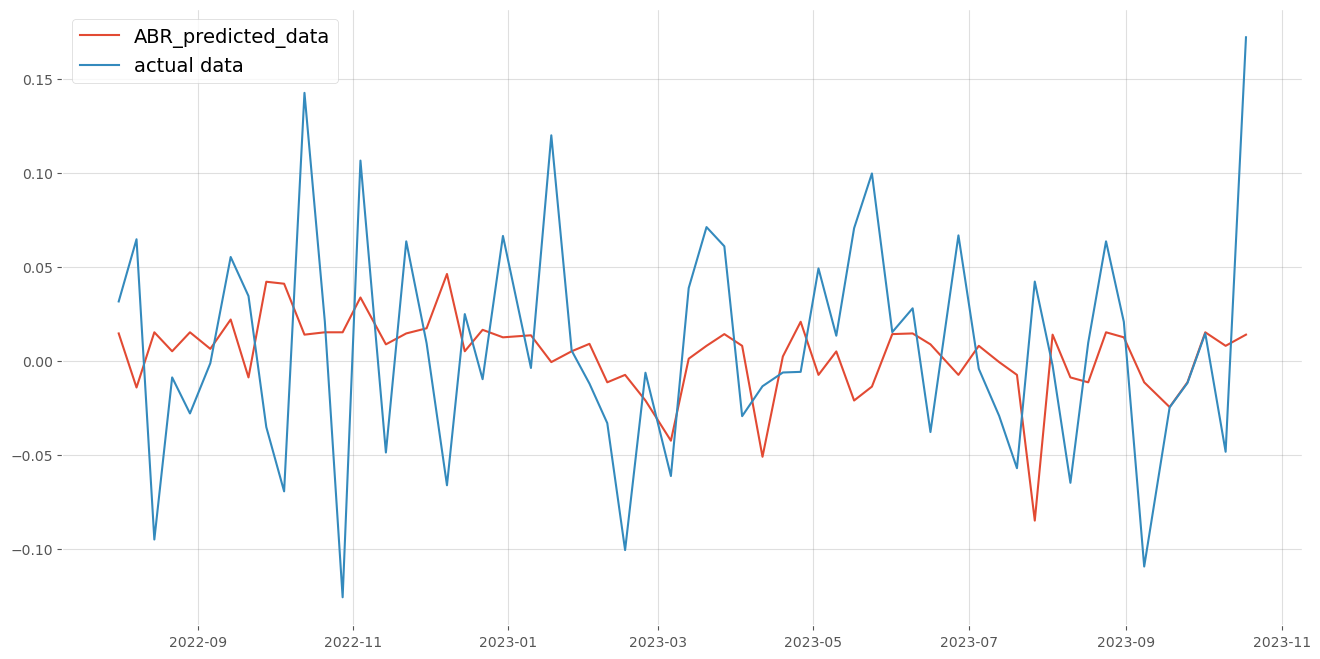

In [129]:
plt.figure(figsize=[16, 8])
plt.plot(predicted, label="ABR_predicted_data")
plt.plot(Y_test, label="actual data")

plt.legend()

plt.show()

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊